 **Clasificación (BD_IPSA_1940.xlsx):**  A partir de las variables continuas (TCH y %Sac.Caña), crear categorías que permitan clasificar los registros en niveles de desempeño:

-   Para  **%Sac.Caña:**  Niveles de sacarosa  **alto, medio y bajo**.
-   Para  **TCH:**  Niveles  **alto, medio y bajo**.
- 
**Parte 2: Modelo de Clasificación**

**Creación de Categorías:**

-   Definir umbrales para transformar las variables   . Justificar la metodología empleada para definir estos cortes (por ejemplo, percentiles, criterios de negocio, etc.).

**Desarrollo de Modelos de Clasificación:**

-   Ajustar un modelo de  **regresión logística**  y/o aplicar el algoritmo  **K-Nearest Neighbors (KNN)**  para clasificar las observaciones según los niveles definidos.
-   Empleando regularización, analizar la importancia de las variables predictoras en el desempeño de la clasificación.

**Validación y Evaluación:**

-   Emplear una estrategia de validación (por ejemplo, validación cruzada) y justificar la elección.
-   Reportar y analizar métricas de evaluación para clasificación (accuracy, precision, recall, F1-score, kappa.).

In [76]:
#importamos las librerias necesarias para el analisis eda y los modelos de regresion logistica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc




In [77]:
#leemos el archivo xlxs
df = pd.read_excel('BD_IPSA_1940.xlsx')
#mostramos las primeras 5 filas
print(df.head())
#mostramos la informacion del dataset
print(df.info())
#mostramos la descripcion del dataset
print(df.describe())
df.head()



   Unnamed: 0          NOME    FAZ TAL         tipocorte   variedad madurada  \
0          11  AMAIME SILCA  81291  40  Mecanizado Verde  CC01-1940       SI   
1          12  AMAIME SILCA  81291  41  Mecanizado Verde  CC01-1940       SI   
2          13  AMAIME SILCA  81291  41  Mecanizado Verde  CC01-1940       SI   
3          15  AMAIME SILCA  81291  43  Mecanizado Verde  CC01-1940       SI   
4          16  AMAIME SILCA  81291  43  Mecanizado Verde  CC01-1940       SI   

                             producto  dosismad  semsmad  ...  cortes    me  \
0  BONUS 250 EC REGULADOR FISIOLÓGICO       0.8      8.3  ...       4  12.7   
1  BONUS 250 EC REGULADOR FISIOLÓGICO       0.8      6.3  ...       2   7.8   
2  BONUS 250 EC REGULADOR FISIOLÓGICO       0.6      7.9  ...       3   8.8   
3  BONUS 250 EC REGULADOR FISIOLÓGICO       0.8      6.6  ...       1   6.1   
4  BONUS 250 EC REGULADOR FISIOLÓGICO       0.6      8.1  ...       2   7.9   

   vejez  sacarosa  mes  periodo  TCH  lluvi

,Unnamed: 0,NOME,FAZ,TAL,tipocorte,variedad,madurada,producto,dosismad,semsmad,...,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea
0,11,AMAIME SILCA,81291,40,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,8.3,...,4,12.7,2.4,14.0,12,202012,112,137,3,6.2
1,12,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,6.3,...,2,7.8,2.3,13.0,3,201903,157,0,3,3.5
2,13,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.6,7.9,...,3,8.8,1.8,13.3,3,202003,167,68,3,4.3
3,15,AMAIME SILCA,81291,43,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,6.6,...,1,6.1,2.5,13.4,3,201903,156,0,3,3.5
4,16,AMAIME SILCA,81291,43,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.6,8.1,...,2,7.9,2.1,14.0,3,202003,151,68,3,4.3


In [78]:
#eliminamos las columnas que no son necesarias Unnamed: 0, NOME, FAZ, variedad, madurada, producto
df.drop(['Unnamed: 0', 'NOME', 'FAZ', 'variedad', 'madurada', 'producto','tipocorte','TAL'], axis=1, inplace=True)
#mostramos las primeras 5 filas
print(df.head())

   dosismad  semsmad  edad  cortes    me  vejez  sacarosa  mes  periodo  TCH  \
0       0.8      8.3  12.3       4  12.7    2.4      14.0   12   202012  112   
1       0.8      6.3  11.2       2   7.8    2.3      13.0    3   201903  157   
2       0.6      7.9  12.2       3   8.8    1.8      13.3    3   202003  167   
3       0.8      6.6  13.1       1   6.1    2.5      13.4    3   201903  156   
4       0.6      8.1  12.2       2   7.9    2.1      14.0    3   202003  151   

   lluvias  grupo_tenencia  pct_diatrea  
0      137               3          6.2  
1        0               3          3.5  
2       68               3          4.3  
3        0               3          3.5  
4       68               3          4.3  


In [79]:
#transformamos la columna periodo en 2 columnas periodo y año ya que el esta en formato YYYYMM y los dejamos enteros
df['periodo'] = df['periodo'].astype(str)
df['año'] = df['periodo'].str[:4].astype(int)
df['mes'] = df['periodo'].str[4:].astype(int)
#mostramos las primeras 5 filas
print(df.head())



   dosismad  semsmad  edad  cortes    me  vejez  sacarosa  mes periodo  TCH  \
0       0.8      8.3  12.3       4  12.7    2.4      14.0   12  202012  112   
1       0.8      6.3  11.2       2   7.8    2.3      13.0    3  201903  157   
2       0.6      7.9  12.2       3   8.8    1.8      13.3    3  202003  167   
3       0.8      6.6  13.1       1   6.1    2.5      13.4    3  201903  156   
4       0.6      8.1  12.2       2   7.9    2.1      14.0    3  202003  151   

   lluvias  grupo_tenencia  pct_diatrea   año  
0      137               3          6.2  2020  
1        0               3          3.5  2019  
2       68               3          4.3  2020  
3        0               3          3.5  2019  
4       68               3          4.3  2020  


In [80]:
#describinos el dataset 
print(df.describe())
print(df.info())

          dosismad      semsmad         edad       cortes           me  \
count  2187.000000  2187.000000  2187.000000  2187.000000  2187.000000   
mean      0.993278     9.164838    12.766118     2.794239     9.197759   
std       0.309096     3.441579     1.117866     1.621195     1.574409   
min       0.000000    -1.600000    10.300000     1.000000     3.400000   
25%       0.800000     7.100000    12.000000     1.000000     8.200000   
50%       1.000000     8.700000    12.500000     2.000000     9.100000   
75%       1.200000    10.600000    13.300000     4.000000    10.100000   
max       9.000000    45.000000    21.100000    14.000000    15.000000   

             vejez     sacarosa          mes          TCH      lluvias  \
count  2187.000000  2187.000000  2187.000000  2187.000000  2187.000000   
mean      4.172154    12.777732     6.758573   142.393233   118.051212   
std       6.339255     0.854397     3.482444    25.838029   144.424675   
min       0.200000     9.200000     1

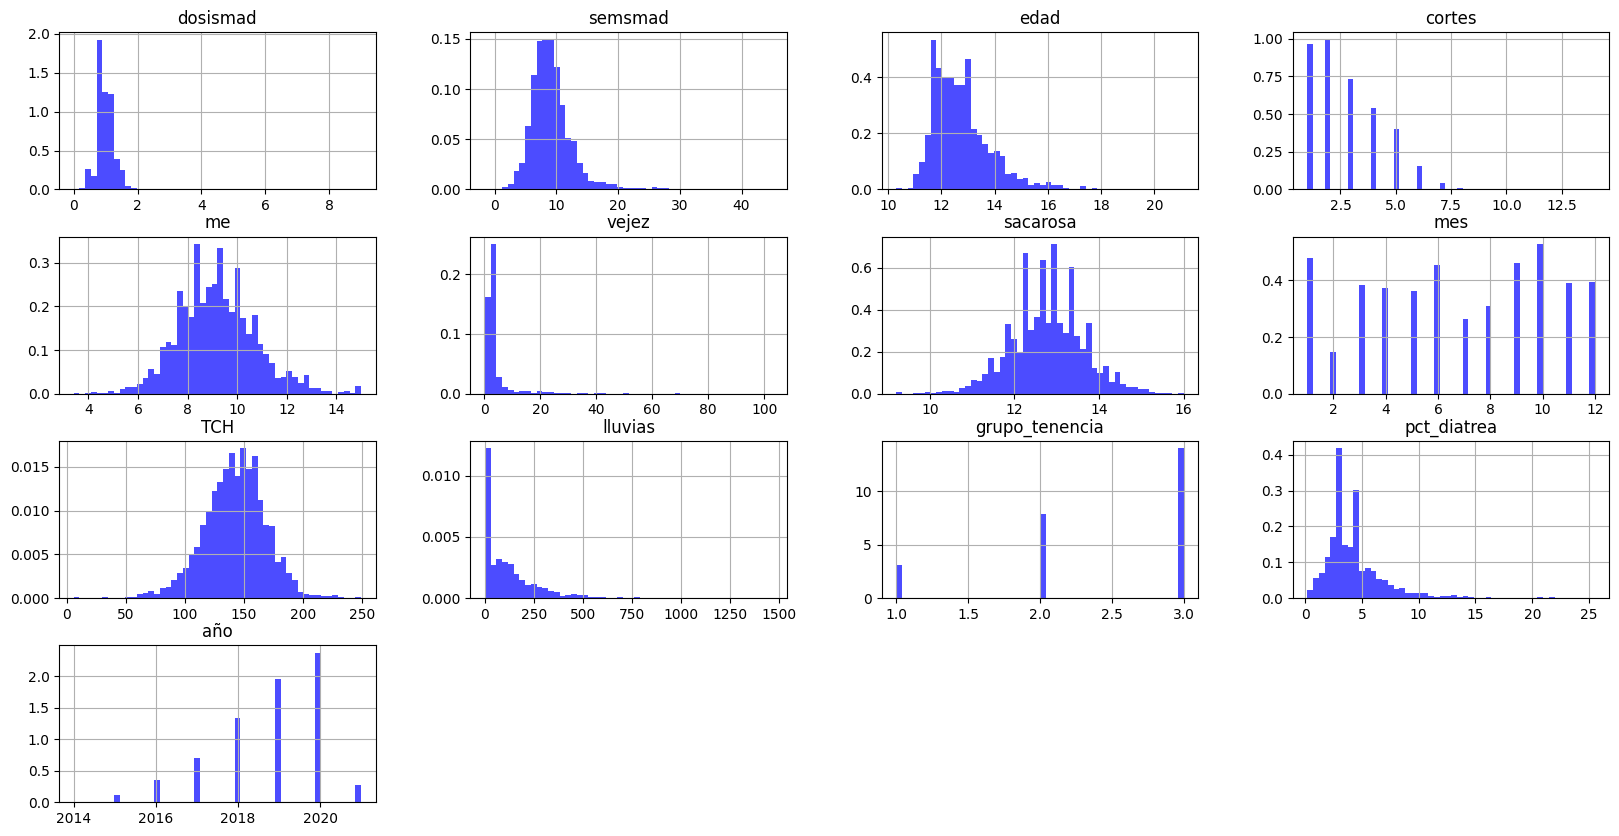

In [81]:
#diagramamos la distribucion de las variables mediante histogramas, configurando el tamaño de los graficos incluimos la curva de densidad y la cantidad de bins
df.hist(figsize=(20,10), bins=50, density=True, color='blue', alpha=0.7)
plt.show()




In [82]:
#revisamos valores nulos
print(df.isnull().sum())
#revisamos valores duplicados
print("Valores Duplicados: ",df.duplicated().sum())



dosismad          0
semsmad           0
edad              0
cortes            0
me                0
vejez             0
sacarosa          0
mes               0
periodo           0
TCH               0
lluvias           0
grupo_tenencia    0
pct_diatrea       0
año               0
dtype: int64
Valores Duplicados:  0


### El Data Set parece no necesitar mayor limpieza por lo que seguimos con el siguiente paso


​Para categorizar las variables **TCH (Toneladas de Caña por Hectárea)** y **%Sac.Caña (Porcentaje de Sacarosa en Caña)** en **"Alto", "Medio" y "Bajo"**, puedes seguir distintos enfoques:

### **1. Basado en Cuantiles (Distribución de los Datos)**

Si tienes una base de datos con múltiples registros, puedes dividir los valores en **terciles** o **cuantiles** para distribuirlos equitativamente:

-   **Bajo**: Valores en el primer tercil (percentil 0-33%)
    
-   **Medio**: Valores en el segundo tercil (percentil 34-66%)
    
-   **Alto**: Valores en el tercer tercil (percentil 67-100%)
    

### **2. Basado en Rangos Definidos por Expertos**

Si tienes criterios específicos dentro de la industria azucarera, puedes establecer umbrales fijos:

Ejemplo (valores referenciales, pueden ajustarse según el contexto):

-   **TCH (Toneladas de Caña por Hectárea)**:
    
    -   **Bajo**: Menos de 80 TCH
        
    -   **Medio**: Entre 80 y 120 TCH
        
    -   **Alto**: Más de 120 TCH
        
-   **%Sac.Caña (Porcentaje de Sacarosa en Caña)**:
    
    -   **Bajo**: Menos de 12%
        
    -   **Medio**: Entre 12% y 14%
        
    -   **Alto**: Más de 14%
        


### Aunque existen estudios asociados a el TCH como 

**Estadísticas Regionales:**

-   **Honduras:** La Asociación de Productores de Azúcar de Honduras (APAH) reporta un rendimiento promedio de TCH de 92.58 entre 2013 y 2024, con valores mínimos de 86.38 y máximos de 99.35. ​[Productores de Azúcar Honduras](https://productoresdeazucarhonduras.com/estadisticas/?utm_source=chatgpt.com)
    

**Estudios en Colombia:**

-   **Santander:** Un estudio evaluó diez variedades de caña de azúcar para producción de panela, encontrando que la variedad CC 93-7711 alcanzó rendimientos de hasta 157.5 TCH, superando el promedio nacional de 139 TCH reportado por Ramírez Durán et al. (2014). ​[Engormix+2ResearchGate+2Redalyc+2](https://www.researchgate.net/publication/306021759_Comportamiento_agroindustrial_de_diez_variedades_de_cana_de_azucar_para_produccion_de_panela_en_Santander_Colombia?utm_source=chatgpt.com)
    
-   **Barbosa:** Otro estudio indicó que las variedades CC 00-3257 y CC 11-600 lograron producciones de 144.15 y 146.38 TCH respectivamente, superiores al promedio regional de 100 TCH en la Hoya del río Suárez. ​[Redalyc](https://www.redalyc.org/journal/5600/560070818002/html/?utm_source=chatgpt.com)
    

**Es importante destacar que estos umbrales pueden variar según factores como la región, variedad de caña, prácticas agrícolas y condiciones climáticas. Por lo tanto, Decidimos usar la opcion de quantiles a no contar con un experto en el tema para definir dichos umbrales**


**Nota:** La clasificación del porcentaje de sacarosa en caña (%Sac.Caña) no se abordó en los estudios mencionados. Para establecer categorías de **"Bajo"**, **"Medio"** y **"Alto"** en esta variable, sería necesario consultar investigaciones adicionales o estadísticas específicas del sector.

In [83]:
#categorizamos las variables objetivos TCH y sacarosa en alto, medio y bajo usando umbrales de quantiles
df['TCH'] = pd.qcut(df['TCH'], q=3, labels=['bajo','medio','alto'])
df['sacarosa'] = pd.qcut(df['sacarosa'], q=3, labels=['bajo','medio','alto'])
#mostramos la cantidad de valores por categoria
print(df['TCH'].value_counts())
print(df['sacarosa'].value_counts())


TCH
bajo     754
alto     728
medio    705
Name: count, dtype: int64
sacarosa
bajo     761
alto     716
medio    710
Name: count, dtype: int64


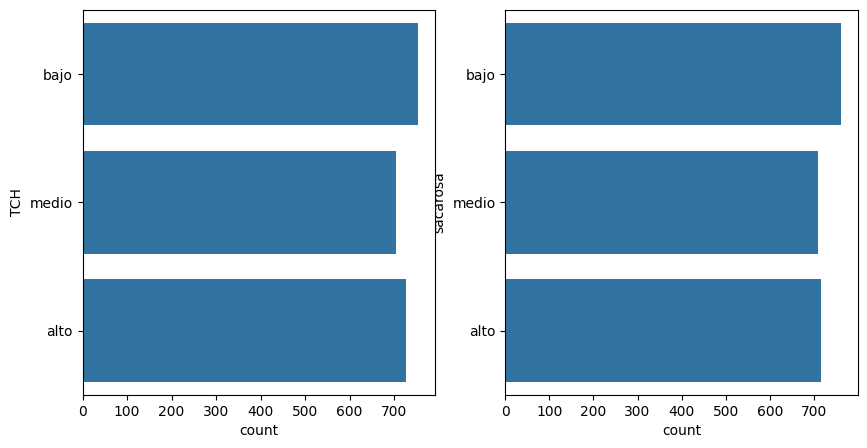

In [84]:
#Graficamos con histogramas las variables categoricas generadas
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(df['TCH'], ax=ax[0])
sns.countplot(df['sacarosa'], ax=ax[1])
plt.show()

In [85]:
#serparacion de variables independientes y dependientes para TCH 
X_tch = df.drop(['TCH','sacarosa'], axis=1)
y_tch = df['TCH']
#separamos los datos en entrenamiento y prueba para X_tch y y_tch
X_train_tch, X_test_tch, y_train_tch, y_test_tch = train_test_split(X_tch, y_tch, test_size=0.3, random_state=42)

#ahora hacemos lo mismo para la variable sacarosa
X_sac = df.drop(['TCH','sacarosa'], axis=1)
y_sac = df['sacarosa']
#separamos los datos en entrenamiento y prueba para X_sac y y_sac
X_train_sac, X_test_sac, y_train_sac, y_test_sac = train_test_split(X_sac, y_sac, test_size=0.3, random_state=42)




In [86]:
#estandardizamos los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_tch = scaler.fit_transform(X_train_tch)
X_test_tch = scaler.transform(X_test_tch)
X_train_sac = scaler.fit_transform(X_train_sac)
X_test_sac = scaler.transform(X_test_sac)


In [87]:
#clasificamos los datos de y en 3 categorias 0,1,2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_tch = le.fit_transform(y_train_tch)
y_test_tch = le.transform(y_test_tch)
y_train_sac = le.fit_transform(y_train_sac)
y_test_sac = le.transform(y_test_sac)



In [96]:
# Entrenamos modelos One-vs-All y Softmax
#Modelo para TCH
model_tch = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500)).fit(X_train_tch, y_train_tch)
#Modelo para sacarosa
model_sac = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500)).fit(X_train_sac, y_train_sac)



C:\Users\rchic\AppData\Local\Temp\ipykernel_18040\3673477416.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0],


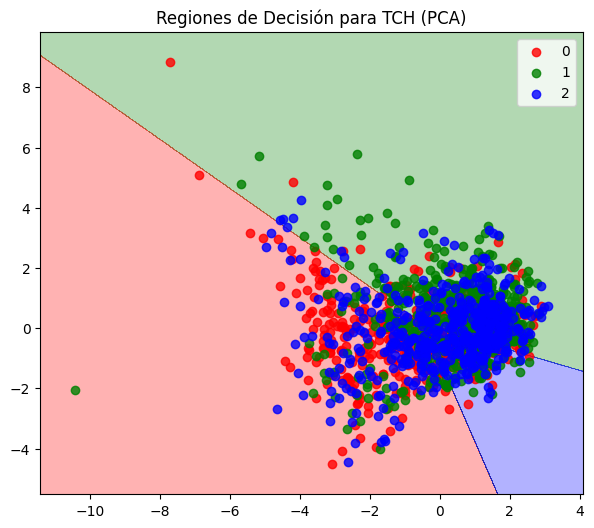

In [97]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Reducir dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_train_tch_pca = pca.fit_transform(X_train_tch)
X_test_tch_pca = pca.transform(X_test_tch)

# Entrenar el modelo con las componentes principales
model_tch_pca = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=200)).fit(X_train_tch_pca, y_train_tch)

# Graficar las regiones de decisión para el modelo de TCH con PCA
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
plot_decision_regions(X_train_tch_pca, y_train_tch, classifier=model_tch_pca, ax=ax, title='Regiones de Decisión para TCH (PCA)')
plt.show()

In [ ]:
#hacemos los mismo para sacarosa
# Reducir dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_train_sac_pca = pca.fit_transform(X_train_sac)
X_test_sac_pca = pca.transform(X_test_sac)
